In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data import AUTOTUNE
from tensorflow.keras.layers import Rescaling, Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [167]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [168]:
batch_size = 32
img_height = 64
img_width = 64
color = 'grayscale'

In [169]:
train_ds = image_dataset_from_directory(
  '/content/drive/MyDrive/hotdog-nothotdog/train',
  validation_split=0.2,
  subset="training",
  seed=123,
#  color_mode = color,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.


In [170]:
val_ds = image_dataset_from_directory(
  '/content/drive/MyDrive/hotdog-nothotdog/train',
  validation_split=0.2,
  subset="validation",
  seed=123,
#  color_mode = color,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [171]:
class_names = train_ds.class_names
class_names

['hotdog', 'nothotdog']

In [172]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

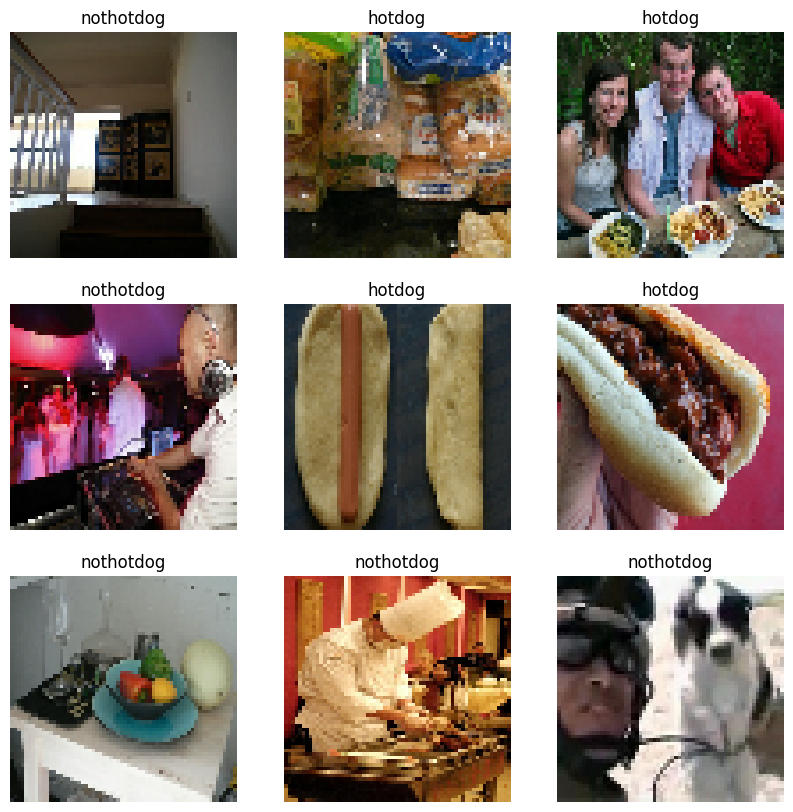

In [173]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [174]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [175]:
num_batches = 0
for image_batch, labels_batch in train_ds:
  num_batches +=1
  # print(image_batch.shape)
  # print(labels_batch.shape)
  # break
print(num_batches)

75


In [129]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


In [130]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [176]:
num_classes = len(class_names)

model = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.3),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [177]:
model.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

In [178]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/30
75/75 [==============================] - 11s 100ms/step - loss: 0.6715 - acc: 0.5871 - val_loss: 0.6340 - val_acc: 0.6650
Epoch 2/30
75/75 [==============================] - 9s 111ms/step - loss: 0.6125 - acc: 0.6658 - val_loss: 0.5967 - val_acc: 0.6817
Epoch 3/30
75/75 [==============================] - 9s 112ms/step - loss: 0.5867 - acc: 0.6954 - val_loss: 0.5908 - val_acc: 0.6967
Epoch 4/30
75/75 [==============================] - 8s 98ms/step - loss: 0.5676 - acc: 0.7004 - val_loss: 0.5961 - val_acc: 0.6783
Epoch 5/30
75/75 [==============================] - 8s 103ms/step - loss: 0.5559 - acc: 0.7154 - val_loss: 0.5714 - val_acc: 0.7200
Epoch 6/30
75/75 [==============================] - 10s 120ms/step - loss: 0.5161 - acc: 0.7471 - val_loss: 0.5597 - val_acc: 0.7250
Epoch 7/30
75/75 [==============================] - 10s 126ms/step - loss: 0.5107 - acc: 0.7517 - val_loss: 0.6136 - val_acc: 0.6583
Epoch 8/30
75/75 [==============================] - 10s 126ms/step - loss:

In [136]:
num_classes = len(class_names)

model_simp1 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  BatchNormalization(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_simp1.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

epochs=30
history = model_simp1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/30
75/75 [==============================] - 2s 8ms/step - loss: 0.7062 - acc: 0.6208 - val_loss: 0.6736 - val_acc: 0.5500
Epoch 2/30
75/75 [==============================] - 0s 5ms/step - loss: 0.5505 - acc: 0.7163 - val_loss: 0.6660 - val_acc: 0.6233
Epoch 3/30
75/75 [==============================] - 0s 5ms/step - loss: 0.4821 - acc: 0.7617 - val_loss: 0.6326 - val_acc: 0.6850
Epoch 4/30
75/75 [==============================] - 0s 5ms/step - loss: 0.4087 - acc: 0.8183 - val_loss: 0.6251 - val_acc: 0.6217
Epoch 5/30
75/75 [==============================] - 0s 5ms/step - loss: 0.3455 - acc: 0.8533 - val_loss: 0.5855 - val_acc: 0.6883
Epoch 6/30
75/75 [==============================] - 0s 5ms/step - loss: 0.2781 - acc: 0.8896 - val_loss: 0.5783 - val_acc: 0.6933
Epoch 7/30
75/75 [==============================] - 0s 5ms/step - loss: 0.2216 - acc: 0.9229 - val_loss: 0.6216 - val_acc: 0.6667
Epoch 8/30
75/75 [==============================] - 0s 5ms/step - loss: 0.1769 - acc: 0.94

In [137]:
# add more layers to the model
num_classes = len(class_names)

model2 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

epochs=30
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/30
75/75 [==============================] - 2s 8ms/step - loss: 0.6590 - acc: 0.6142 - val_loss: 0.5995 - val_acc: 0.6800
Epoch 2/30
75/75 [==============================] - 0s 6ms/step - loss: 0.6014 - acc: 0.6742 - val_loss: 0.5832 - val_acc: 0.6967
Epoch 3/30
75/75 [==============================] - 0s 6ms/step - loss: 0.5797 - acc: 0.7021 - val_loss: 0.5711 - val_acc: 0.7100
Epoch 4/30
75/75 [==============================] - 1s 8ms/step - loss: 0.5511 - acc: 0.7196 - val_loss: 0.5821 - val_acc: 0.7133
Epoch 5/30
75/75 [==============================] - 1s 7ms/step - loss: 0.5263 - acc: 0.7358 - val_loss: 0.5707 - val_acc: 0.7050
Epoch 6/30
75/75 [==============================] - 1s 7ms/step - loss: 0.4977 - acc: 0.7617 - val_loss: 0.5496 - val_acc: 0.7250
Epoch 7/30
75/75 [==============================] - 1s 7ms/step - loss: 0.4710 - acc: 0.7738 - val_loss: 0.5633 - val_acc: 0.7117
Epoch 8/30
75/75 [==============================] - 0s 6ms/step - loss: 0.4372 - acc: 0.80

Let us plot the data now.

In [ ]:
# acc = history.history['acc']
# val_acc = history.history['val_acc']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

We have a big overfitting issue. Let us see what can be done for it.

In [139]:
# add more layers to the model
num_classes = len(class_names)

model3 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(64, 3, padding='same', activation='relu'),
  Dropout(0.5),
  MaxPooling2D(2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

epochs=60
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/60
75/75 [==============================] - 3s 9ms/step - loss: 0.6927 - acc: 0.5617 - val_loss: 0.6532 - val_acc: 0.5850
Epoch 2/60
75/75 [==============================] - 0s 6ms/step - loss: 0.6223 - acc: 0.6667 - val_loss: 0.6107 - val_acc: 0.6883
Epoch 3/60
75/75 [==============================] - 0s 6ms/step - loss: 0.6152 - acc: 0.6650 - val_loss: 0.6027 - val_acc: 0.6733
Epoch 4/60
75/75 [==============================] - 0s 6ms/step - loss: 0.5740 - acc: 0.6946 - val_loss: 0.5968 - val_acc: 0.7217
Epoch 5/60
75/75 [==============================] - 0s 6ms/step - loss: 0.5513 - acc: 0.7296 - val_loss: 0.5904 - val_acc: 0.6983
Epoch 6/60
75/75 [==============================] - 0s 6ms/step - loss: 0.5382 - acc: 0.7346 - val_loss: 0.5994 - val_acc: 0.6983
Epoch 7/60
75/75 [==============================] - 0s 6ms/step - loss: 0.5036 - acc: 0.7567 - val_loss: 0.5826 - val_acc: 0.6850
Epoch 8/60
75/75 [==============================] - 0s 6ms/step - loss: 0.4901 - acc: 0.76

In [140]:
# add more layers to the model
num_classes = len(class_names)

model4 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  BatchNormalization(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

model4.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

epochs=60
history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/60
75/75 [==============================] - 2s 8ms/step - loss: 0.6473 - acc: 0.6471 - val_loss: 0.6815 - val_acc: 0.6200
Epoch 2/60
75/75 [==============================] - 0s 6ms/step - loss: 0.4823 - acc: 0.7638 - val_loss: 0.6738 - val_acc: 0.5617
Epoch 3/60
75/75 [==============================] - 0s 6ms/step - loss: 0.3739 - acc: 0.8404 - val_loss: 0.6612 - val_acc: 0.6183
Epoch 4/60
75/75 [==============================] - 0s 5ms/step - loss: 0.2631 - acc: 0.8958 - val_loss: 0.5893 - val_acc: 0.7400
Epoch 5/60
75/75 [==============================] - 0s 6ms/step - loss: 0.1564 - acc: 0.9450 - val_loss: 0.5828 - val_acc: 0.7183
Epoch 6/60
75/75 [==============================] - 0s 5ms/step - loss: 0.0848 - acc: 0.9750 - val_loss: 0.6047 - val_acc: 0.6933
Epoch 7/60
75/75 [==============================] - 0s 6ms/step - loss: 0.0651 - acc: 0.9804 - val_loss: 0.7744 - val_acc: 0.7250
Epoch 8/60
75/75 [==============================] - 0s 5ms/step - loss: 0.0323 - acc: 0.99

Now let us play the game. copy the image you have into the google drive.

In [188]:
batch_size = 32
img_height = 64
img_width = 64

test_ds = image_dataset_from_directory(
  '/content/drive/MyDrive/hotdog-nothotdog/test_1',
  seed=123,
#  color_mode = color,
  image_size=(img_height, img_width),
  batch_size=batch_size)
hotdog = round(model.predict(test_ds)[0][0])

print()
print()

print(f'================')
if hotdog:
  print(f'it is a hotdog!')
else:
  print(f'it is NOT a hotdog!')


Found 1 files belonging to 1 classes.
1/1 [==============================] - 0s 305ms/step


it is a hotdog!


****